## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9844341	total: 70.1ms	remaining: 1m 10s
1:	learn: 0.9654323	total: 71.1ms	remaining: 35.5s
2:	learn: 0.9455323	total: 72.3ms	remaining: 24s
3:	learn: 0.9293305	total: 73.3ms	remaining: 18.3s
4:	learn: 0.9132393	total: 74.4ms	remaining: 14.8s
5:	learn: 0.8956258	total: 75.6ms	remaining: 12.5s
6:	learn: 0.8801503	total: 76.6ms	remaining: 10.9s
7:	learn: 0.8638599	total: 77.5ms	remaining: 9.61s
8:	learn: 0.8479834	total: 78.4ms	remaining: 8.63s
9:	learn: 0.8317696	total: 79.4ms	remaining: 7.86s
10:	learn: 0.8155133	total: 80.3ms	remaining: 7.21s
11:	learn: 0.8003002	total: 81ms	remaining: 6.67s
12:	learn: 0.7856850	total: 81.9ms	remaining: 6.21s
13:	learn: 0.7709124	total: 82.8ms	remaining: 5.83s
14:	learn: 0.7589387	total: 83.7ms	remaining: 5.5s
15:	learn: 0.7449750	total: 84.5ms	remaining: 5.2s
16:	learn: 0.7324986	total: 85.3ms	remaining: 4.93s
17:	learn: 0.7200862	total: 86.1ms	remaining: 4.69s
18:	learn: 0.7080020	total: 86.8ms	remaining: 4.4

45:	learn: 0.4841485	total: 110ms	remaining: 2.27s
46:	learn: 0.4781267	total: 111ms	remaining: 2.25s
47:	learn: 0.4725438	total: 112ms	remaining: 2.21s
48:	learn: 0.4666670	total: 113ms	remaining: 2.18s
49:	learn: 0.4615075	total: 113ms	remaining: 2.16s
50:	learn: 0.4561187	total: 114ms	remaining: 2.13s
51:	learn: 0.4502675	total: 115ms	remaining: 2.1s
52:	learn: 0.4457558	total: 116ms	remaining: 2.08s
53:	learn: 0.4426405	total: 117ms	remaining: 2.05s
54:	learn: 0.4380139	total: 118ms	remaining: 2.02s
55:	learn: 0.4334135	total: 118ms	remaining: 2s
56:	learn: 0.4301623	total: 119ms	remaining: 1.97s
57:	learn: 0.4250335	total: 120ms	remaining: 1.95s
58:	learn: 0.4212973	total: 121ms	remaining: 1.93s
59:	learn: 0.4172232	total: 122ms	remaining: 1.91s
60:	learn: 0.4128339	total: 123ms	remaining: 1.89s
61:	learn: 0.4094865	total: 124ms	remaining: 1.87s
62:	learn: 0.4052607	total: 125ms	remaining: 1.85s
63:	learn: 0.4018713	total: 125ms	remaining: 1.83s
64:	learn: 0.3981084	total: 126ms	r

142:	learn: 0.2598929	total: 192ms	remaining: 1.15s
143:	learn: 0.2588433	total: 193ms	remaining: 1.15s
144:	learn: 0.2580828	total: 194ms	remaining: 1.14s
145:	learn: 0.2571249	total: 195ms	remaining: 1.14s
146:	learn: 0.2564059	total: 196ms	remaining: 1.14s
147:	learn: 0.2554916	total: 196ms	remaining: 1.13s
148:	learn: 0.2544701	total: 197ms	remaining: 1.13s
149:	learn: 0.2532896	total: 198ms	remaining: 1.12s
150:	learn: 0.2520279	total: 199ms	remaining: 1.12s
151:	learn: 0.2509729	total: 200ms	remaining: 1.11s
152:	learn: 0.2506807	total: 200ms	remaining: 1.11s
153:	learn: 0.2498132	total: 201ms	remaining: 1.1s
154:	learn: 0.2491904	total: 202ms	remaining: 1.1s
155:	learn: 0.2485199	total: 203ms	remaining: 1.1s
156:	learn: 0.2478335	total: 204ms	remaining: 1.09s
157:	learn: 0.2471939	total: 205ms	remaining: 1.09s
158:	learn: 0.2464326	total: 205ms	remaining: 1.09s
159:	learn: 0.2459005	total: 206ms	remaining: 1.08s
160:	learn: 0.2451895	total: 207ms	remaining: 1.08s
161:	learn: 0.2

272:	learn: 0.1879571	total: 300ms	remaining: 800ms
273:	learn: 0.1871997	total: 302ms	remaining: 799ms
274:	learn: 0.1871308	total: 303ms	remaining: 798ms
275:	learn: 0.1867205	total: 304ms	remaining: 796ms
276:	learn: 0.1863011	total: 305ms	remaining: 795ms
277:	learn: 0.1861414	total: 305ms	remaining: 793ms
278:	learn: 0.1855188	total: 306ms	remaining: 791ms
279:	learn: 0.1854086	total: 307ms	remaining: 790ms
280:	learn: 0.1851949	total: 308ms	remaining: 789ms
281:	learn: 0.1847871	total: 309ms	remaining: 788ms
282:	learn: 0.1846395	total: 310ms	remaining: 786ms
283:	learn: 0.1841907	total: 311ms	remaining: 785ms
284:	learn: 0.1838794	total: 312ms	remaining: 783ms
285:	learn: 0.1831517	total: 313ms	remaining: 782ms
286:	learn: 0.1826112	total: 314ms	remaining: 781ms
287:	learn: 0.1823742	total: 315ms	remaining: 780ms
288:	learn: 0.1822356	total: 316ms	remaining: 778ms
289:	learn: 0.1816267	total: 317ms	remaining: 777ms
290:	learn: 0.1813693	total: 318ms	remaining: 776ms
291:	learn: 

366:	learn: 0.1545637	total: 383ms	remaining: 661ms
367:	learn: 0.1543317	total: 384ms	remaining: 660ms
368:	learn: 0.1539995	total: 385ms	remaining: 658ms
369:	learn: 0.1538052	total: 386ms	remaining: 657ms
370:	learn: 0.1534472	total: 387ms	remaining: 656ms
371:	learn: 0.1531205	total: 387ms	remaining: 654ms
372:	learn: 0.1527211	total: 388ms	remaining: 653ms
373:	learn: 0.1524665	total: 389ms	remaining: 651ms
374:	learn: 0.1523768	total: 390ms	remaining: 650ms
375:	learn: 0.1519465	total: 391ms	remaining: 649ms
376:	learn: 0.1516193	total: 392ms	remaining: 647ms
377:	learn: 0.1515491	total: 392ms	remaining: 645ms
378:	learn: 0.1511219	total: 393ms	remaining: 644ms
379:	learn: 0.1510610	total: 394ms	remaining: 642ms
380:	learn: 0.1509310	total: 394ms	remaining: 641ms
381:	learn: 0.1506524	total: 395ms	remaining: 639ms
382:	learn: 0.1503754	total: 396ms	remaining: 638ms
383:	learn: 0.1503429	total: 397ms	remaining: 636ms
384:	learn: 0.1500834	total: 397ms	remaining: 635ms
385:	learn: 

497:	learn: 0.1214940	total: 490ms	remaining: 494ms
498:	learn: 0.1211661	total: 491ms	remaining: 493ms
499:	learn: 0.1209274	total: 492ms	remaining: 492ms
500:	learn: 0.1206325	total: 493ms	remaining: 491ms
501:	learn: 0.1204677	total: 494ms	remaining: 490ms
502:	learn: 0.1202172	total: 495ms	remaining: 489ms
503:	learn: 0.1199284	total: 496ms	remaining: 488ms
504:	learn: 0.1196689	total: 496ms	remaining: 487ms
505:	learn: 0.1195103	total: 497ms	remaining: 485ms
506:	learn: 0.1192137	total: 498ms	remaining: 484ms
507:	learn: 0.1188701	total: 499ms	remaining: 483ms
508:	learn: 0.1186312	total: 500ms	remaining: 482ms
509:	learn: 0.1183764	total: 501ms	remaining: 481ms
510:	learn: 0.1181663	total: 502ms	remaining: 480ms
511:	learn: 0.1178614	total: 502ms	remaining: 479ms
512:	learn: 0.1176952	total: 503ms	remaining: 478ms
513:	learn: 0.1176238	total: 504ms	remaining: 477ms
514:	learn: 0.1173632	total: 505ms	remaining: 475ms
515:	learn: 0.1171106	total: 506ms	remaining: 474ms
516:	learn: 

596:	learn: 0.1022736	total: 573ms	remaining: 387ms
597:	learn: 0.1020851	total: 574ms	remaining: 386ms
598:	learn: 0.1020211	total: 575ms	remaining: 385ms
599:	learn: 0.1018769	total: 576ms	remaining: 384ms
600:	learn: 0.1016332	total: 576ms	remaining: 383ms
601:	learn: 0.1013981	total: 577ms	remaining: 382ms
602:	learn: 0.1012379	total: 578ms	remaining: 381ms
603:	learn: 0.1010207	total: 579ms	remaining: 380ms
604:	learn: 0.1009883	total: 580ms	remaining: 379ms
605:	learn: 0.1008566	total: 581ms	remaining: 377ms
606:	learn: 0.1006575	total: 581ms	remaining: 376ms
607:	learn: 0.1005519	total: 582ms	remaining: 375ms
608:	learn: 0.1002954	total: 583ms	remaining: 374ms
609:	learn: 0.1001436	total: 584ms	remaining: 373ms
610:	learn: 0.1000629	total: 585ms	remaining: 372ms
611:	learn: 0.0999352	total: 586ms	remaining: 371ms
612:	learn: 0.0997619	total: 586ms	remaining: 370ms
613:	learn: 0.0995889	total: 587ms	remaining: 369ms
614:	learn: 0.0994637	total: 588ms	remaining: 368ms
615:	learn: 

724:	learn: 0.0838765	total: 680ms	remaining: 258ms
725:	learn: 0.0837705	total: 681ms	remaining: 257ms
726:	learn: 0.0835797	total: 682ms	remaining: 256ms
727:	learn: 0.0833970	total: 683ms	remaining: 255ms
728:	learn: 0.0832544	total: 684ms	remaining: 254ms
729:	learn: 0.0832356	total: 684ms	remaining: 253ms
730:	learn: 0.0830296	total: 685ms	remaining: 252ms
731:	learn: 0.0828455	total: 686ms	remaining: 251ms
732:	learn: 0.0826439	total: 687ms	remaining: 250ms
733:	learn: 0.0825063	total: 688ms	remaining: 249ms
734:	learn: 0.0824199	total: 689ms	remaining: 248ms
735:	learn: 0.0822678	total: 689ms	remaining: 247ms
736:	learn: 0.0821755	total: 690ms	remaining: 246ms
737:	learn: 0.0820746	total: 691ms	remaining: 245ms
738:	learn: 0.0819523	total: 692ms	remaining: 244ms
739:	learn: 0.0817934	total: 693ms	remaining: 243ms
740:	learn: 0.0817090	total: 694ms	remaining: 242ms
741:	learn: 0.0815159	total: 694ms	remaining: 241ms
742:	learn: 0.0814157	total: 695ms	remaining: 241ms
743:	learn: 

825:	learn: 0.0728024	total: 763ms	remaining: 161ms
826:	learn: 0.0727602	total: 764ms	remaining: 160ms
827:	learn: 0.0727201	total: 765ms	remaining: 159ms
828:	learn: 0.0725979	total: 766ms	remaining: 158ms
829:	learn: 0.0725039	total: 767ms	remaining: 157ms
830:	learn: 0.0723954	total: 768ms	remaining: 156ms
831:	learn: 0.0723276	total: 769ms	remaining: 155ms
832:	learn: 0.0721909	total: 770ms	remaining: 154ms
833:	learn: 0.0720864	total: 771ms	remaining: 153ms
834:	learn: 0.0719796	total: 772ms	remaining: 153ms
835:	learn: 0.0718855	total: 773ms	remaining: 152ms
836:	learn: 0.0717866	total: 774ms	remaining: 151ms
837:	learn: 0.0717188	total: 774ms	remaining: 150ms
838:	learn: 0.0716182	total: 775ms	remaining: 149ms
839:	learn: 0.0714569	total: 776ms	remaining: 148ms
840:	learn: 0.0714132	total: 777ms	remaining: 147ms
841:	learn: 0.0713285	total: 778ms	remaining: 146ms
842:	learn: 0.0711665	total: 779ms	remaining: 145ms
843:	learn: 0.0711282	total: 779ms	remaining: 144ms
844:	learn: 

955:	learn: 0.0615615	total: 871ms	remaining: 40.1ms
956:	learn: 0.0614971	total: 872ms	remaining: 39.2ms
957:	learn: 0.0614434	total: 873ms	remaining: 38.3ms
958:	learn: 0.0613286	total: 873ms	remaining: 37.3ms
959:	learn: 0.0613224	total: 874ms	remaining: 36.4ms
960:	learn: 0.0612407	total: 875ms	remaining: 35.5ms
961:	learn: 0.0611492	total: 876ms	remaining: 34.6ms
962:	learn: 0.0611234	total: 877ms	remaining: 33.7ms
963:	learn: 0.0610363	total: 877ms	remaining: 32.8ms
964:	learn: 0.0609629	total: 878ms	remaining: 31.9ms
965:	learn: 0.0609566	total: 879ms	remaining: 30.9ms
966:	learn: 0.0609067	total: 880ms	remaining: 30ms
967:	learn: 0.0608048	total: 881ms	remaining: 29.1ms
968:	learn: 0.0607298	total: 881ms	remaining: 28.2ms
969:	learn: 0.0606261	total: 882ms	remaining: 27.3ms
970:	learn: 0.0605700	total: 883ms	remaining: 26.4ms
971:	learn: 0.0605342	total: 884ms	remaining: 25.5ms
972:	learn: 0.0604238	total: 885ms	remaining: 24.6ms
973:	learn: 0.0603158	total: 886ms	remaining: 23

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

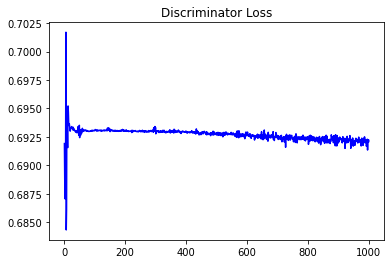

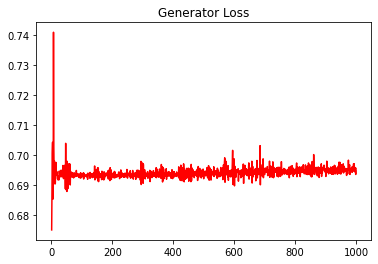

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08899529899056344


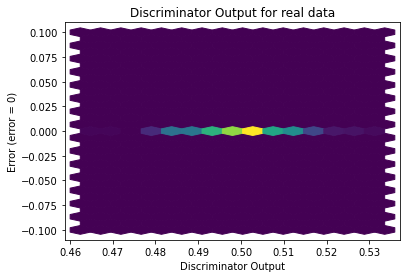

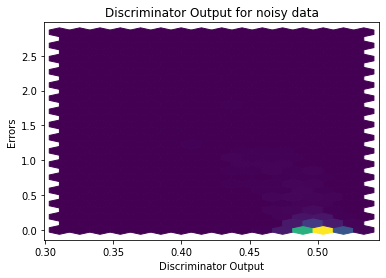

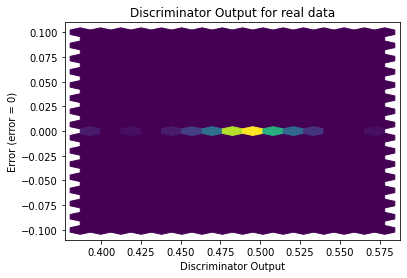

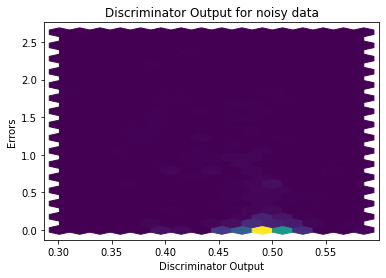

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


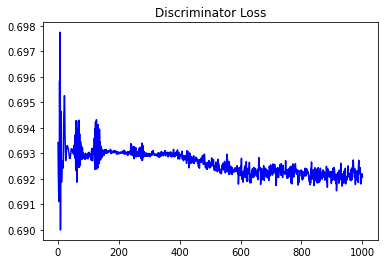

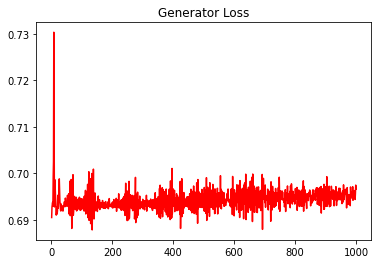

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11125306879349896


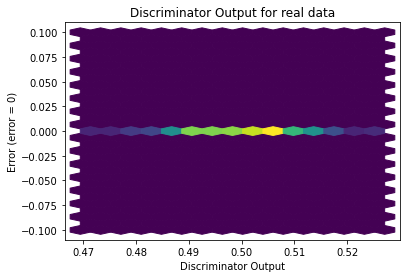

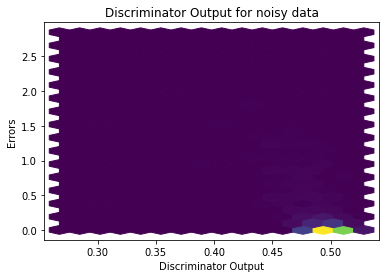

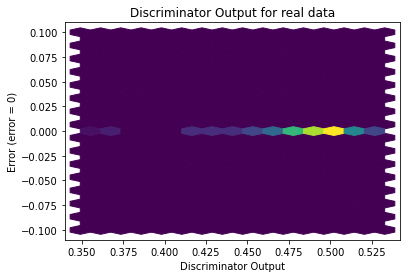

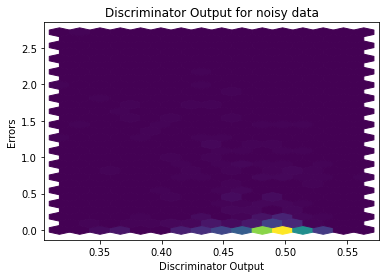

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4697]], requires_grad=True)
